In [ ]:


import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'facial-expression:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F31050%2F39603%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240202%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240202T101838Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D416015a3954244ce735ae947224fbc723a858a6f88f8842debc132556201b22066e5ae2cc7cc7efcde661c9c27e3fc8d23f56852b3a1d7b1ddf8cbbc58c0bbdb2a3e66b8e59c8190e556a5281508a3b92e66510f0b8ffcdc96a1472ecb183cfde4d7f8aaf7d7e803d0d2955431c538e2ce0347e28c9852b400eb47e3c651e6f668e3f3d7ac08df14833603b1878c546c97d90fb1f5828b8da80f0ff65634f075ff99e1e5d3df994ff970160dc16fb144ce6a321c7de0c8891d5e5f5f842d1d9340e761baa344d4dd0b51d4b50ab7a6139c743fda3c058c7b35b2949b78a162a3246729961a65206a6a94346f0c39af1fd20153964fbdce9f20257b4f9aaa68c9'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 202559978 bytes downloaded
Downloaded and uncompressed: facial-expression
Data source import complete.


In [ ]:

import numpy as np
import pandas as pd
import cv2



In [ ]:
df = pd.read_csv('../input/facial-expression/fer2013.csv')

In [ ]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
len(df.iloc[0]['pixels'].split())
# 48 * 48

2304

In [ ]:
label_map = ['Anger', 'Neutral', 'Fear', 'Happy', 'Sad', 'Surprise']

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
img = df.iloc[0]['pixels'].split()

In [ ]:
img = [int(i) for i in img]

In [ ]:
type(img[0])

int

In [ ]:
len(img)

2304

In [ ]:
img = np.array(img)

In [ ]:
img = img.reshape(48,48)

In [ ]:
img.shape

(48, 48)

Text(0.5, 0, '0')

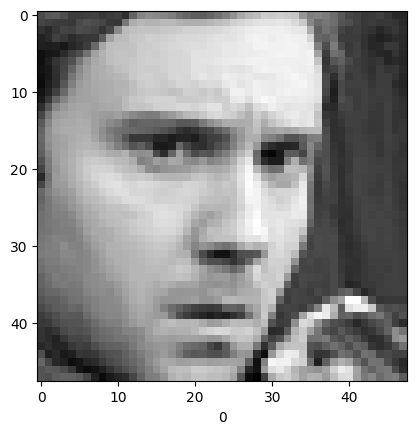

In [ ]:
plt.imshow(img, cmap='gray')
plt.xlabel(df.iloc[0]['emotion'])

In [ ]:
X = []
y = []

In [ ]:
def getData(path):
    anger = 0
    fear = 0
    sad = 0
    happy = 0
    surprise = 0
    neutral = 0
    df = pd.read_csv(path)

    X = []
    y = []

    for i in range(len(df)):
        if df.iloc[i]['emotion'] != 1:
            if df.iloc[i]['emotion'] == 0:
                if anger <= 4000:
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    anger += 1
                else:
                    pass

            if df.iloc[i]['emotion'] == 2:
                if fear <= 4000:
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    fear += 1
                else:
                    pass

            if df.iloc[i]['emotion'] == 3:
                if happy <= 4000:
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    happy += 1
                else:
                    pass

            if df.iloc[i]['emotion'] == 4:
                if sad <= 4000:
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    sad += 1
                else:
                    pass

            if df.iloc[i]['emotion'] == 5:
                if surprise <= 4000:
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    surprise += 1
                else:
                    pass

            if df.iloc[i]['emotion'] == 6:
                if neutral <= 4000:
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    neutral += 1
                else:
                    pass



    return X, y


In [ ]:
X, y = getData('../input/facial-expression/fer2013.csv')

In [ ]:
np.unique(y, return_counts=True)

(array([0, 2, 3, 4, 5, 6]), array([4001, 4001, 4001, 4001, 4001, 4001]))

In [ ]:
X = np.array(X)/255.0
y = np.array(y)

In [ ]:
X.shape, y.shape

((24006, 2304), (24006,))

In [ ]:
y_o = []
for i in y:
    if i != 6:
        y_o.append(i)

    else:
        y_o.append(1)

In [ ]:
np.unique(y_o, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([4001, 4001, 4001, 4001, 4001, 4001]))

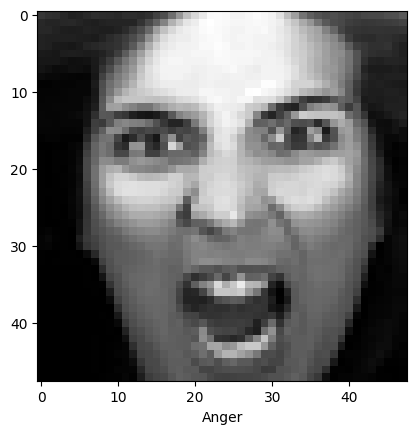

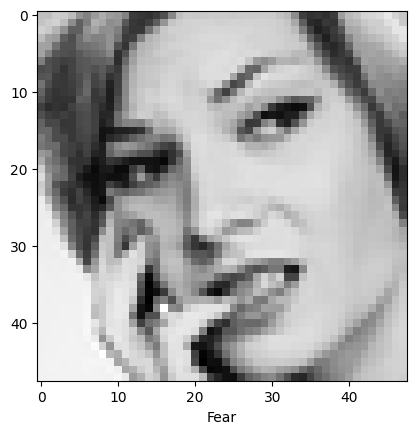

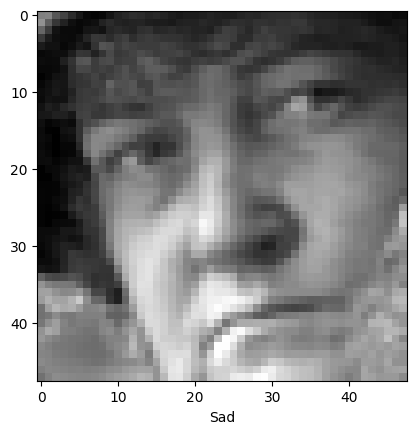

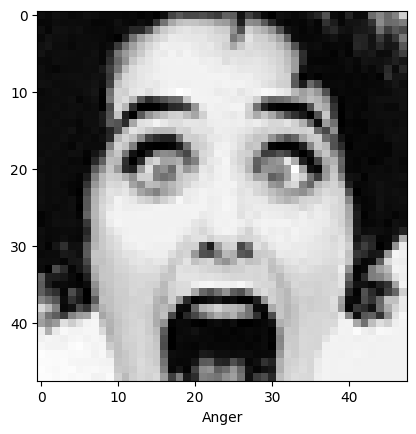

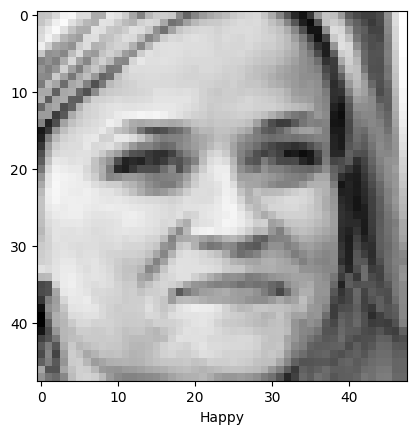

In [ ]:
for i in range(5):
    r = np.random.randint((1), 24000, 1)[0]
    plt.figure()
    plt.imshow(X[r].reshape(48,48), cmap='gray')
    plt.xlabel(label_map[y_o[r]])

In [ ]:
X = X.reshape(len(X), 48, 48, 1)

In [ ]:
# no_of_images, height, width, coloar_map

In [ ]:
X.shape

(24006, 48, 48, 1)

In [ ]:
from keras.utils import to_categorical
y_new = to_categorical(y_o, num_classes=6)

In [ ]:
len(y_o), y_new.shape

(24006, (24006, 6))

In [ ]:
y_o[150], y_new[150]

(0, array([1., 0., 0., 0., 0., 0.], dtype=float32))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *

In [ ]:
model = Sequential()


input_shape = (48,48,1)


model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

## (15, 15) --->  30
model.add(Flatten())
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [ ]:
model.fit(X, y_new, epochs=22, batch_size=64, shuffle=True, validation_split=0.2)

Epoch 1/22
301/301 [==============================] - 21s 43ms/step - loss: 2.1266 - accuracy: 0.2485 - val_loss: 2.0693 - val_accuracy: 0.1183
Epoch 2/22
301/301 [==============================] - 12s 39ms/step - loss: 1.6722 - accuracy: 0.3439 - val_loss: 1.4512 - val_accuracy: 0.4334
Epoch 3/22
301/301 [==============================] - 11s 37ms/step - loss: 1.5249 - accuracy: 0.4002 - val_loss: 1.7569 - val_accuracy: 0.4138
Epoch 4/22
301/301 [==============================] - 11s 37ms/step - loss: 1.3962 - accuracy: 0.4589 - val_loss: 1.7925 - val_accuracy: 0.3313
Epoch 5/22
301/301 [==============================] - 11s 37ms/step - loss: 1.3265 - accuracy: 0.4850 - val_loss: 2.3960 - val_accuracy: 0.2118
Epoch 6/22
301/301 [==============================] - 11s 36ms/step - loss: 1.2478 - accuracy: 0.5182 - val_loss: 1.5210 - val_accuracy: 0.4436
Epoch 7/22
301/301 [==============================] - 11s 36ms/step - loss: 1.1775 - accuracy: 0.5473 - val_loss: 1.3423 - val_accuracy:

In [ ]:
import keras
model.save('model2.h5')
model.save('my_model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import cv2
from keras.models import load_model
model = load_model('/content/my_model.keras')

In [ ]:
test_img = cv2.imread('/content/05-12-21-happy-people.jpg', 0)

In [ ]:
test_img.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
test_img = cv2.resize(test_img, (48,48))
test_img.shape

In [ ]:
test_img = test_img.reshape(1,48,48,1)

In [ ]:
prediction=model.predict(test_img)
prediction

In [ ]:
label_map = ['Anger', 'Neutral', 'Fear', 'Happy', 'Sad', 'Surprise']

In [ ]:
prediction=np.argmax(prediction)
print(label_map[prediction])